In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,seaborn,sklearn,fbprophet,xgboost,lightgbm,catboost

CPython 3.6.6
IPython 7.8.0

numpy 1.17.0
scipy 1.3.1
pandas 0.25.2
matplotlib 3.0.3
seaborn 0.9.0
sklearn 0.21.3
fbprophet 0.4.post2
xgboost 0.90
lightgbm 2.3.0
catboost 0.18

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-47-generic
machine    : x86_64
processor  : 
CPU cores  : 72
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:         257709        2534       60993        1314      194181      252056
Swap:       1000976        4036      996940


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A plot with seaborn

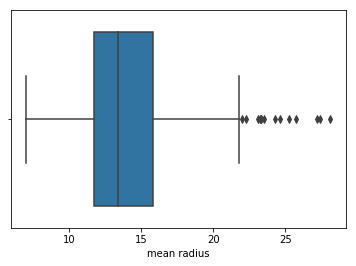

In [6]:
sns.boxplot(x='mean radius', data=df);

In [7]:
import xgboost

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

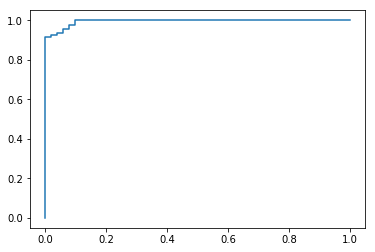

In [9]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [10]:
!vw --version

8.5.0


In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [12]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

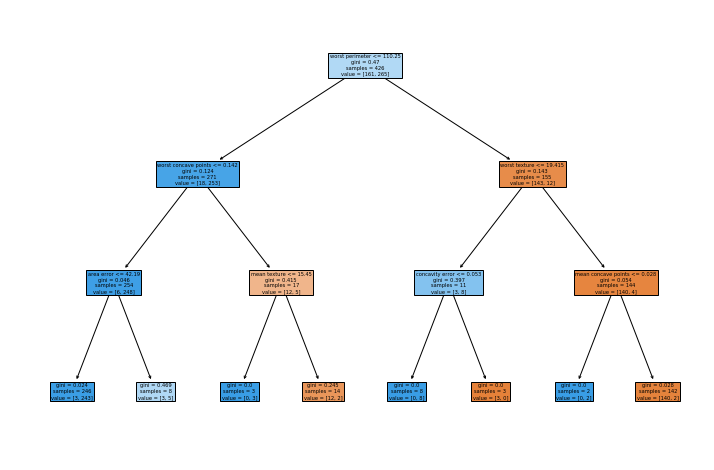

In [13]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=cancer.feature_names, filled=True);